In [2]:
import pandas as pd
# linear regression from sklear.linear_model
from sklearn.linear_model import LinearRegression

In [3]:
#read housing dataset
housing = pd.read_csv (r'data/house.csv')
#make a copy of following features
housingC = housing[['housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value','ocean_proximity']].copy()

In [4]:
# print head to check
housingC.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housingC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [6]:
# check for missing values
housingC['total_bedrooms'].isna().value_counts()
# fill misisng values with median
median_tb = housing['total_bedrooms'].median()
# fill the na's with median
housingC['total_bedrooms'].fillna(median_tb,inplace = True)
housingC['total_bedrooms'].isna().value_counts()

False    20640
Name: total_bedrooms, dtype: int64

In [7]:
# create the mapping  similar to last lecture
proximity_mapping = {'ocean_proximity': {'INLAND' : 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND':4, '<1H OCEAN':5}}
# check the mapping dictionary
proximity_mapping.items()
# if it worked replace the strings with floats
housingC.replace(proximity_mapping, inplace = True)
# check it worked with head
housingC.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [8]:
from sklearn.preprocessing import StandardScaler as ss
temp = housingC[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value']].copy()
# now fit the scaler.
temp = ss().fit_transform(temp)

In [9]:
# replace original features with scaled features
housingC[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value']] = temp
# print t ocheck
print(housingC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20640 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.3 MB
None


In [10]:
#create predictor variable dataframe
housing_pred = housingC.iloc[:,[0,1,2,3,4,5,7]]
housing_pred.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,3
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,3
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,3
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,3
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,3


In [11]:
housing_targ = housingC.iloc[:,[6]]
housing_targ.head()

,median_house_value
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900


<font color = purple>Split the data set into training and test examples</font>

In [12]:
from sklearn.model_selection import train_test_split
#using train_test_split create training 
x_housing_train, x_housing_test, y_housing_train, y_housing_test = train_test_split(housing_pred, housing_targ, test_size = 0.3, random_state = 123)

## <font color = blue> Linear Regression

In [13]:
#help(LinearRegression)

# create a linearRegression for our training data. 
# (The learning process)
linReg = LinearRegression().fit(x_housing_train, y_housing_train)

In [14]:
# check coefficience?
linReg.coef_
# go back to the video to see the linear regression.

array([[ 0.16858844, -0.16516143,  0.21052231, -0.44098006,  0.43693961,
         0.69922856,  0.11090314]])

In [15]:
housing_est = linReg.predict(x_housing_test)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
# Least squared error
linReg_MSE = mean_squared_error(y_housing_test, housing_est)
linReg_MSE

0.398255919925677

In [18]:
# Mean absolute error
linReg_MAE = mean_absolute_error(y_housing_test, housing_est)
linReg_MAE

0.46026484588259703

In [19]:
import matplotlib as mpl
%matplotlib inline

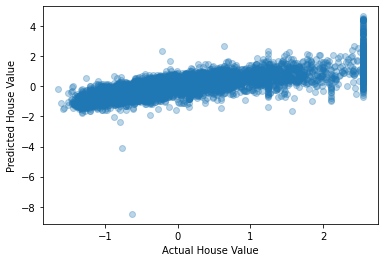

In [20]:
mpl.pyplot.scatter(x = y_housing_test, y = housing_est, alpha = 0.3)
mpl.pyplot.title = ('Linear Regression - Actual vs Predicted')
mpl.pyplot.xlabel('Actual House Value')
mpl.pyplot.ylabel('Predicted House Value')
mpl.pyplot.show()
# data is capped here which was explored in last weeks.

## <font color = blue> Logistic regression - Binary classification

In [21]:
# import titanic dataset as pandas dataframe
titanic = pd.read_csv (r'data/titanic.csv')

In [22]:
# get a feel for the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font color = purple> The variable cabin has quite a high ratio of missing values<br>
   whereas Variable Emabrked has only 2 missing values<br>

    Age has around 20% values missing

In [23]:
# make a copy
titanicC = titanic.copy()
#drop rows where Embarked has missing values
titanicC.dropna(subset = ['Embarked'], inplace = True)

<font color = purple> see distribution of survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

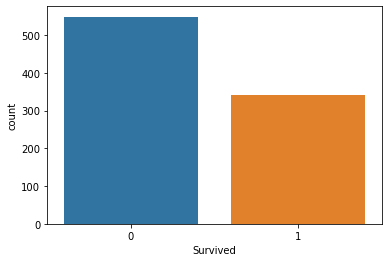

In [24]:
# Look at the distribution
import seaborn as sb
sb.countplot(x = 'Survived', data = titanic)

<font color = purple>See who survived and did not w.r.t to their cabin class

<AxesSubplot:xlabel='Survived', ylabel='count'>

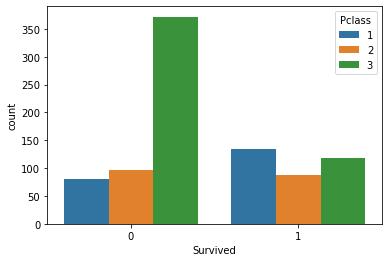

In [25]:
sb.countplot(x = 'Survived', data = titanicC, hue = 'Pclass')

In [26]:
#drop the column Cabin
titanicC = titanicC.loc[:,titanicC.columns != 'Cabin']
titanicC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 123.3+ KB


<font color = purple> Impute the age column with mean age

In [27]:
mean_age = titanicC['Age'].mean()
titanicC['Age'].fillna(mean_age, inplace = True)
titanicC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 123.3+ KB


<font color = purple> select the predictor + target variables<br>
    you may not need some of the features as predictor

In [28]:
titanic_df = titanicC[['Survived','Pclass', 'Sex','Age','SibSp','Parch','Embarked']]
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 95.6+ KB


<font color = purple> map the character features to numeric

In [29]:
sex_mapping = {'Sex':{'female':1, 'male':2}}
sex_mapping.items()

dict_items([('Sex', {'female': 1, 'male': 2})])

In [30]:
titanic_df.replace(sex_mapping, inplace=True)
titanic_df.head()

/home/mark/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,2,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,2,35.0,0,0,S


In [31]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
embarked_mapping = {'Embarked': {'C': 1, 'Q': 2,'S':3 }}
embarked_mapping.items()

dict_items([('Embarked', {'C': 1, 'Q': 2, 'S': 3})])

In [33]:
titanic_df.replace(embarked_mapping, inplace=True)
titanic_df.head()

/home/mark/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,2,22.0,1,0,3
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,3
3,1,1,1,35.0,1,0,3
4,0,3,2,35.0,0,0,3


In [34]:
# create predictor dataframe and target array
x_titanic = titanic_df.iloc[:,1:7]
x_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,2,22.0,1,0,3
1,1,1,38.0,1,0,1
2,3,1,26.0,0,0,3
3,1,1,35.0,1,0,3
4,3,2,35.0,0,0,3


In [35]:
y_titanic = titanic_df.iloc[:,0]
y_titanic.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
# split data into train and test
x_titanic_train, x_titanic_test, y_titanic_train, y_titanic_test = train_test_split(x_titanic, y_titanic, test_size = 0.3, random_state = 101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logit = LogisticRegression(verbose = 1).fit(x_titanic_train, y_titanic_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [39]:
logit_pred = logit.predict(x_titanic_test)

<font color = purple> measure the performance of the classification model
 <br>
    confusion matrix <br>
    

    TP | FN
    _______

    FP | TN
    

<font color = purple> Accuracy = (TP+TN)/(TP+FP+FP+FN)

<font color = purple> Precision is the ratio of correctly predicted positive observations to the total predicted positive observations <br>
    
    precision = TP/(TP+FP) 

<font color = purple> Recall is the ratio of correctly predicted positive observations to all the actual positive observations
    
    recall = TP/(TP+FN)

<font color = purple>  Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.<br>
    <br>
    accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs <br><br>
    
    f1 = 2((precision * recall)/(precision + recall))

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [41]:
confusion_matrix(y_titanic_test, logit_pred)
# true positive - false negative
# false positive - true negative

array([[149,  14],
       [ 33,  71]])

In [42]:
accuracy_score(y_titanic_test, logit_pred)

0.8239700374531835

In [43]:
precision_score(y_titanic_test, logit_pred)

0.8352941176470589

In [44]:
recall_score(y_titanic_test, logit_pred)

0.6826923076923077

In [45]:
f1_score(y_titanic_test, logit_pred)

0.7513227513227515

## <font color = blue>  Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree_overfit = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)

In [48]:
tree_overfit.fit(x_titanic_train, y_titanic_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

In [49]:
tree_overfit.score(x_titanic_train, y_titanic_train)

0.9517684887459807

In [50]:
tree_overfit.score(x_titanic_test, y_titanic_test)

0.7940074906367042

<font color = purple> as expected it has overfit on training set <br>
    
   <font color = purple> the freedom of Decison tree needs to be restricted to overcome overfitting<br>
    
 <font color = purple>   let's use the hyperpaprameters of the model to do that.<br>
    
  <font color = purple>  max_depth - restricts the depth of the tree (only these many consecutive questions can be asked to assign class)

In [51]:
tree_restricted = DecisionTreeClassifier(criterion = 'entropy', random_state = 123, max_depth = 4)

In [52]:
tree_restricted.fit(x_titanic_train, y_titanic_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [53]:
tree_restricted.score(x_titanic_train, y_titanic_train)

0.8344051446945338

In [54]:
tree_restricted.score(x_titanic_test, y_titanic_test)

0.8426966292134831

<font color = purple> let's see feature importance 

In [55]:
print(tree_restricted.feature_importances_)

[0.21135129 0.52649497 0.16778247 0.06395597 0.00792949 0.02248581]


In [56]:
print(tree_overfit.feature_importances_)

[0.12077567 0.26312219 0.42043487 0.10437981 0.05596368 0.03532378]
